# Diamond Price Predictor


## Table of Contents
* [Introduction](#intro)
    + [Dataset Source](#source)
    + [Dataset Details](#details)
    + [Dataset Variables](#variables)
    + [Response Variable](#response)
    + [Clarification](#intro-clarification)
* [Goals & Objectives](#goals--objectives)
* [Data Cleaning & Preprocessing](#data-cleaning--preprocessing)
* [Data Exploration & Visualisation](#data-exploration--visualisation)
* [Summary & Conclusions](#summary--conclusions)
* [References](#references)


## Introduction <a id='intro'></a>

#### Dataset Source <a id='source'></a>

The diamonds.csv dataset used in this notebook was sourced from Kaggle (Agrawal, 2017). This dataset contains multiple specifications of a collection of unidentified diamonds, such as carat, cut and color.

#### Dataset Details <a id='details'></a>

The Diamonds dataset is about the determining factors of the way diamonds are priced, which includes and contains information such as carat, cut, color, clarity, depth, length, width and height, as well as price. These deciding features of diamonds are what gives us the final market price we see online and in stores. These features are sufficient to conduct predictive modeling of the diamond prices as a multiple linear regression problem.

Diamond prices and the accurate predictions on their price, despite the multitude of factors that influence them, effects a multitude of people, whether it effects businesses, diamond mining companies, or regular buyers. An accurate price prediction tool would undoubtedly be 'priceless' within this community. 

The dataset has 9 features and 53941 observations, however a random subset of 1000 observations will be investigated from the full dataset. Below can be seen are randomly generated sample size of 10 unique rows within the dataset.

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from tabulate import tabulate

df = pd.read_csv('diamonds.csv')
df_10_samples = df.sample(n=10)
print(tabulate(
    df_10_samples, 
    headers=['Carat', 'Cut', 'Color', 'Clarity', 'Depth', 'Table', 'Length', 'Width', 'Height', 'Price'], 
    tablefmt='fancy_grid'))

╒═══════╤═════════╤═══════════╤═════════╤═══════════╤═════════╤═════════╤══════════╤═════════╤══════════╤═════════╕
│       │   Carat │ Cut       │ Color   │ Clarity   │   Depth │   Table │   Length │   Width │   Height │   Price │
╞═══════╪═════════╪═══════════╪═════════╪═══════════╪═════════╪═════════╪══════════╪═════════╪══════════╪═════════╡
│ 16954 │    1.01 │ Very Good │ F       │ VS2       │    61.6 │      57 │     6.39 │    6.46 │     3.96 │    6773 │
├───────┼─────────┼───────────┼─────────┼───────────┼─────────┼─────────┼──────────┼─────────┼──────────┼─────────┤
│  9726 │    1.14 │ Premium   │ H       │ SI1       │    63   │      57 │     6.7  │    6.65 │     4.2  │    4654 │
├───────┼─────────┼───────────┼─────────┼───────────┼─────────┼─────────┼──────────┼─────────┼──────────┼─────────┤
│  7842 │    1.02 │ Very Good │ H       │ SI2       │    59.7 │      58 │     6.53 │    6.57 │     3.91 │    4303 │
├───────┼─────────┼───────────┼─────────┼───────────┼─────────┼─────────

#### Dataset Variables <a id='variables'></a>

The descriptions of our dataset are taken from the Kaggle data source (Agrawal, 2017).

In [3]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['carat','Numeric','CA','Weight of diamond in carats (0.2 to 5.01)'],
         ['cut','Nominal categorial','NA','Quality of cut (Fair, Good, Very Good, Premium, Ideal)'],
         ['color','Nominal categorical','NA','Diamond colour, from J (worst) to D (best)'],
         ['clarity', 'Nominal catergorial','NA','Measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)'],
         ['depth', 'Numeric', '%', 'Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43% to 79%)'],
         ['table','Numeric','mm','Width of top of diamond relative to widest point (43mm to 95mm)'],
         ['x','Numeric','mm','Width (0 to 10.74)'],
         ['y','Numeric','mm','Length (0 to 58.9)'],
         ['z','Numeric','mm','Depth (0 to 31.8)'],
         ['price','Numeric','NA','Price in US dollars ($326 to $18,823)']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════╤═════════════════════╤═════════╤════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Name    │ Data Type           │ Units   │ Description                                                                                    │
╞═════════╪═════════════════════╪═════════╪════════════════════════════════════════════════════════════════════════════════════════════════╡
│ carat   │ Numeric             │ CA      │ Weight of diamond in carats (0.2 to 5.01)                                                      │
├─────────┼─────────────────────┼─────────┼────────────────────────────────────────────────────────────────────────────────────────────────┤
│ cut     │ Nominal categorial  │ NA      │ Quality of cut (Fair, Good, Very Good, Premium, Ideal)                                         │
├─────────┼─────────────────────┼─────────┼────────────────────────────────────────────────────────────────────────────────────────────────┤
│ color   │ N

#### Response Variable <a id='response'></a>

The response variable in this dataset will be the price of diamonds in dollars. The price of diamonds will be predicted based on the explanatory/descriptive variables.

## Goals & Objectives <a id='goals--objectives'></a>

As one of the most sought after minerals on the planet, the price of diamonds have remained high for decades. Approximately 142 million carats worth of diamond were estimated to have been produced from mines worldwide in 2019. Major producing countries include Australia, Canada, the Democratic Republic of Congo, Botswana, South Africa, and Russia, and worldwide reserves are estimated to be some 1.2 billion carats. The business of diamonds is highly lucrative, and thus the goal of this report is two fold:

* To predict the potential increase or decrease in the diamond market prices based upon factors within the dataset **(diamonds.csv)**
* Determine which features of the dataset are considered to be the 'best' indicators in determining the price change in diamonds.

A secondary objective is to perform exploratory data analysis by basic data visualisation & descriptive statistics plots to gain insight into the patterns and relationships existing between subsequent data after cleaning & preprocessing, which is the main focus subject of this Phase 1 report. In essence, the objectives of the project also involve the following:

* Take past and current data trends to create plots and graphs
* Use these graphs to create links and connections between data
* Find trends within the dataset using the links/connections previously found

## Data Cleaning & Preprocessing <a id='data-cleaning--preprocessing'></a>

Within this part, we go through the steps necessary to clean the data for reliable and ease of use.

#### Data Cleaning Steps

* Drop unnecessary information/features within the dataset; to clean up the database and reduce redundant information.
* Modify/correct/rename column names; for ease of use and user readability.
* Check the dataset for missing values; incomplete data cannot be used accuratly to determine trends/connections.
* Remove all rows with missing values and/or zero values.
* Randomly sample the dataset for (amount) of rows

##### Original Dataset Columns

In [4]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

The `Depth` column in the dataset is semi-redundant due to it being a percentage calculation of the `Length(x)` divided by the `Width (y),` a calculation easily performed by the user. As the data type is a percentage, the column may lead to some confusion due to there also being a second `Depth` value in the form of `z`, which is the height in the diamond from its highest point to its lowest point.

Although this information may seem redundant, it is a crucial factor of a diamond's cut, as `Depth` and `Table` are the main two factors that determine the value of a diamond.

For this reason we will be keeping all of the columns provided for us in the dataset as they are all unique enough to differentiate between each category.

Though we are keeping all of the columns within the dataset, they are all poorly labelled. For this dataset we will be `Uppercasing` the start of each column name, and we will also be renaming the `x, y, z` columns respectively with `length, width and height.`

In [5]:
df.columns = df.columns.str.lower().str.strip()

columns_renamed = {
    'carat': 'Carat', 
    'cut': 'Cut', 
    'color': 'Colour', 
    'clarity': 'Clarity', 
    'depth': 'Depth', 
    'table': 'Table', 
    'x': 'Length', 
    'y': 'Width', 
    'z': 'Height',
    'price': 'Price'
}

df = df.rename(columns= columns_renamed)
df.sample(10, random_state=666)

Carat      Cut Colour Clarity  Depth  Table  Length  Width  Height  \
19779   1.50     Good      J     VS1   60.7   61.0    7.27   7.30    4.42   
27501   2.01  Premium      I     VS1   62.9   59.0    8.03   7.94    5.02   
30425   0.32    Ideal      G    VVS2   61.6   55.0    4.41   4.42    2.72   
52401   0.65  Premium      G    VVS1   59.3   57.0    5.59   5.47    3.28   
37512   0.42  Premium      F     VS1   59.8   57.0    4.89   4.85    2.91   
42917   0.53     Good      F     SI1   63.8   58.0    5.17   5.12    3.28   
39200   0.41     Good      F    VVS2   63.6   56.0    4.72   4.68    2.99   
10106   1.20  Premium      J     SI1   60.0   61.0    6.89   6.84    4.12   
24895   1.53    Ideal      E     SI1   61.2   58.0    7.39   7.44    4.54   
37099   0.41    Ideal      E     SI1   62.4   55.0    4.78   4.74    2.97   

       Price  
19779   8347  
27501  18206  
30425    730  
52401   2510  
37512    985  
42917   1363  
39200   1064  
10106   4717  
24895  13324  
37099    969

Adding a new column 'Volume', derived from Length x Width x Height. Reshuffled the column order so that 'Price' (target feature) is at the end.

In [6]:
df['Volume'] = df['Length'] * df['Width'] * df['Height']
cols_at_end = ['Price']
df = df[[p for p in df if p not in cols_at_end] 
        + [p for p in cols_at_end if p in df]]
df.sample(10, random_state=666)

Carat      Cut Colour Clarity  Depth  Table  Length  Width  Height  \
19779   1.50     Good      J     VS1   60.7   61.0    7.27   7.30    4.42   
27501   2.01  Premium      I     VS1   62.9   59.0    8.03   7.94    5.02   
30425   0.32    Ideal      G    VVS2   61.6   55.0    4.41   4.42    2.72   
52401   0.65  Premium      G    VVS1   59.3   57.0    5.59   5.47    3.28   
37512   0.42  Premium      F     VS1   59.8   57.0    4.89   4.85    2.91   
42917   0.53     Good      F     SI1   63.8   58.0    5.17   5.12    3.28   
39200   0.41     Good      F    VVS2   63.6   56.0    4.72   4.68    2.99   
10106   1.20  Premium      J     SI1   60.0   61.0    6.89   6.84    4.12   
24895   1.53    Ideal      E     SI1   61.2   58.0    7.39   7.44    4.54   
37099   0.41    Ideal      E     SI1   62.4   55.0    4.78   4.74    2.97   

           Volume  Price  
19779  234.573820   8347  
27501  320.066164  18206  
30425   53.018784    730  
52401  100.293544   2510  
37512   69.015015    985  
42917   86.822912   1363  
39200   66.047904   1064  
10106  194.165712   4717  
24895  249.616464  13324  
37099   67.291884    969

Next we need to check the data types of each of the columns to ensure they are correct;

In [7]:
print(f'Data types of the Columns (Object indicates a string datatype):')
print(df.dtypes)

Data types of the Columns (Object indicates a string datatype):
Carat      float64
Cut         object
Colour      object
Clarity     object
Depth      float64
Table      float64
Length     float64
Width      float64
Height     float64
Volume     float64
Price        int64
dtype: object


As all datatypes correspond correctly to what their data type value should be, there is no need to change the data types that the columns have. 

Next we check the objects within the database to ensure that each have unique values that are not correlated to each other and that there are no mistakes within the dataset.

In [8]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Dataset Summary of Categorical Features (Object Datatypes)</b>'))
df.describe(include='object').T

count unique    top   freq
Cut      53940      5  Ideal  21551
Colour   53940      7      G  11292
Clarity  53940      8    SI1  13065

In [9]:
categoricalColumns = df.columns[df.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(df[col].unique())
    print('')

Unique values for Cut
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

Unique values for Colour
['E' 'I' 'J' 'H' 'F' 'G' 'D']

Unique values for Clarity
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']



We then proceed to do the same for the numerical values of the dataset, ensuring there are no outliers and that the data is as clean as possible for later use.

In [10]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Dataset Summary of Numerical Features</b>'))
df.describe(include=['int64','float64']).T

count         mean          std    min        25%          50%  \
Carat   53940.0     0.797940     0.474011    0.2    0.40000     0.700000   
Depth   53940.0    61.749405     1.432621   43.0   61.00000    61.800000   
Table   53940.0    57.457184     2.234491   43.0   56.00000    57.000000   
Length  53940.0     5.731157     1.121761    0.0    4.71000     5.700000   
Width   53940.0     5.734526     1.142135    0.0    4.72000     5.710000   
Height  53940.0     3.538734     0.705699    0.0    2.91000     3.530000   
Volume  53940.0   129.849403    78.245262    0.0   65.13683   114.808572   
Price   53940.0  3932.799722  3989.439738  326.0  950.00000  2401.000000   

                75%          max  
Carat      1.040000      5.01000  
Depth     62.500000     79.00000  
Table     59.000000     95.00000  
Length     6.540000     10.74000  
Width      6.540000     58.90000  
Height     4.040000     31.80000  
Volume   170.842451   3840.59806  
Price   5324.250000  18823.00000

In [11]:
print(f"\nNumber of null values for each column:")
print(df.isnull().sum())


Number of null values for each column:
Carat      0
Cut        0
Colour     0
Clarity    0
Depth      0
Table      0
Length     0
Width      0
Height     0
Volume     0
Price      0
dtype: int64


We see here that there are no null/missing values for the dataset. However, that does not mean there are unusual values that still need to be cleaned up. From table 2: dataset summary of numerical features, it shows that length, width and height all have a minimum value of 0.0, which indicates that there are zero values in the data. While sometimes a feature can have zero values, in this case, it would not make sense for a diamond to have a length, width or height of 0.0. Therefore, the observations with 0.0 values for these respective features, will be dropped.

In [12]:
df = df[~(df[['Length','Width', 'Height']] == 0.0).any(axis=1)]

display(HTML('<b>Table 3: Updated Dataset Summary of Numerical Features</b>'))
df.describe(include=['int64','float64']).T

count         mean          std         min         25%         50%  \
Carat   53920.0     0.797698     0.473795    0.200000    0.400000     0.70000   
Depth   53920.0    61.749514     1.432331   43.000000   61.000000    61.80000   
Table   53920.0    57.456834     2.234064   43.000000   56.000000    57.00000   
Length  53920.0     5.731627     1.119423    3.730000    4.710000     5.70000   
Width   53920.0     5.734887     1.140126    3.680000    4.720000     5.71000   
Height  53920.0     3.540046     0.702530    1.070000    2.910000     3.53000   
Volume  53920.0   129.897567    78.219789   31.707984   65.189759   114.84018   
Price   53920.0  3930.993231  3987.280446  326.000000  949.000000  2401.00000   

                75%          max  
Carat      1.040000      5.01000  
Depth     62.500000     79.00000  
Table     59.000000     95.00000  
Length     6.540000     10.74000  
Width      6.540000     58.90000  
Height     4.040000     31.80000  
Volume   170.846415   3840.59806  
Price   5323.250000  18823.00000

Any value that are zero values for Length, Width and Height have been dropped, which can be seen in table 3 with the updated values. No more further dataset clean-up required.

#### Random Sampling

The dataset has 53941 observations, however a random subset of 1000 observations will be investigated for ease of computation. At the end, we display 5 random rows from our cleaned data.

In [13]:
df = df.sample(n=1000, random_state=999, replace=True)
df.shape
df.sample(5, random_state=999)

Carat      Cut Colour Clarity  Depth  Table  Length  Width  Height  \
36562   0.36    Ideal      G    VVS1   62.1   56.0    4.60   4.58    2.85   
39645   0.47  Premium      G     SI1   58.8   58.0    5.11   5.06    2.99   
43947   0.31    Ideal      E     SI1   62.1   55.0    4.33   4.36    2.70   
24244   2.04     Fair      E     SI2   67.4   56.0    7.80   7.76    5.24   
27766   0.32  Premium      H     VS2   60.7   60.0    4.41   4.39    2.67   

           Volume  Price  
36562   60.043800    945  
39645   77.311234   1086  
43947   50.972760    516  
24244  317.166720  12454  
27766   51.690933    648

## Data Exploration & Visualisation <a id='data-exploration--visualisation'></a>

After pre-pocessing the dataset, it is now considered to be clean and can now be investigated and visualised.

**Plot Count:** This report contains four one-variable plots, four two-variable plots, and five three-variable plots

### One-Variable Plots

#### Box plot of Price of Diamonds

Evidently, the box plot in Figure 1 shows that the distribution of price is heavily right-skewed.

In [14]:
fig = px.box(df, x="Price", 
             title="Figure 1: Box Plot of Price of Diamonds",
             labels={
                     "Price": "Price ($)",
             })
fig.show()

#### Histogram of Price of Diamonds

Figure 2 further shows the depreciation in the number of highly priced diamonds, which must mean that there are a varying number of factors that effects the price of diamonds. These factors will be further investigated in future plots. 

In [15]:
fig = px.histogram(
    df, 
    x = "Price",
    title = "Figure 2: Histogram Plot of Price of Diamonds",
    labels={"Price": "Price ($)"}
)
fig.show()

#### Barchart of Cut

Figure 3 shows a much higher concentration of much better quality diamonds, as shown by the much higher count of 'Ideal' Diamonds. This graph has an inverse trend compared to figure 2. Comparing the figures implies that price isn't solely dependant on the cut of the diamond.

In [16]:
fig = px.bar(
    df, 
    x="Cut", 
    color="Cut", 
    title='Figure 3: Barchart Plot of Diamond Cuts', 
    category_orders={
        'Cut': ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
    })
fig.show()

#### Barchart Plot of Clarity of Diamonds

The bar chart down below shows a representation of the spread of the diamond clarities across the board. It is seen that the most common clarity for a diamond is SI1.

In [17]:
fig = px.bar(
    df, 
    x="Clarity", 
    color="Clarity", 
    title='Figure 4: Barchart Plot of Clarity of Diamonds', 
    category_orders={
        "Clarity": ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
    })
fig.show()

### Two-Variable Plots

#### Scatterplot of Price vs Depth

We have observed the graph below and it is inferred that the price of the diamond falls when the depth is considered an outlier to all others, except in one or two cases, on average if the depth of the diamond is an outlier, the price of the diamond is valued lower.

The clustering of data within the range 57.0% - 65.0% depth indicate that diamonds within this range are considered 'ideal' and highly sought after.

In [18]:

fig = go.Figure(data=go.Scattergl(
    x = df['Depth'],
    y = df['Price'],
    mode='markers',
    marker=dict(
        color=np.random.randn(5),
        colorscale='Viridis',
        line_width=1
    )
))

fig.update_layout(
    height=800,
    title_text='Figure 5: Scatterplot of Price vs Depth',
    xaxis_title="Depth (mm)",
    yaxis_title="Price ($)"
)

fig.show()

#### Box Plot of Price by Color

Figure 6 shows the relationship between the price and color of diamonds. It appears that diamonds that posess more colour (letter gradings higher in the alphabet) are roughly skewed toward higher prices.

In [19]:
fig = px.box(df, 
             y="Price", 
             x="Colour",
            category_orders={
                 "color": ["D", "E", "F", "G", "H", "I", "J"]
             },
             title="Figure 6: Box Plot of Price by Color",
             labels={
                     "Price": "Price ($)",
                     "Colour": "Colour (Grade)"
             })
fig.show()

#### Scatterplot of Price by Clarity

The high concentration of data in the lower bracket of the set indicate that these types of diamonds are in high rotation within the market, and this causes most of them to be valuated lower than those closer to the top of the scatterplot on average.

In [20]:
fig = go.Figure(data=go.Scatter(
    x = df['Price'],
    y = df['Clarity'],
    mode='markers',
    marker=dict(
        size=12,
        color=np.random.randn(53941), 
        colorscale='Viridis', 
        showscale=True
    )
))

fig.update_layout(
    height=800,
    title_text='Figure 7: Scatterplot of Price vs Depth',
    xaxis_title="Price ($)",
    yaxis_title="Clarity"
)

fig.show()

#### Scatter Plot of Price by Table

Figure 8 below indicates that diamonds with a mid to low table sizes (55-60) were valued higher than diamonds with larger table sizes (64+).

In [21]:
fig = go.Figure(data=go.Scattergl(
    x = df['Price'],
    y = df['Table'],
    mode='markers',
    marker=dict(
        color=np.random.randn(5),
        line_width=1
    )
))

fig.update_layout(
    height=800,
    title_text='Figure 8: Scatter Plot of Price by Table',
    xaxis_title="Price ($)",
    yaxis_title="Table (mm)"
)

fig.show()

### Three-Variable Plots

#### Scatterplot Relationship between Depth, Table and Price.

Figure 9 shows the high concentration of data in the 55-60% range for both table and depth, gives a good representation of the average sizing ratio of a diamonds regardless of the price.

In [22]:
fig = px.scatter_3d(
    df, 
    x = "Depth",
    y = 'Table',
    z = 'Price',
    color='Price',
    labels={
        "Price": "Price ($)",
        'Depth': 'Depth (%)',
        'Table': 'Table (%)'},
    size='Price',
    height=700)

camera = dict(
    center=dict(x=0, y=0, z=-0.2),
    eye=dict(x=0.7, y=0.7, z=2.5)
)

fig.update_layout(scene_camera=camera, title='Figure 9: Scatterplot Relationship between Depth, Table and Price')
    
fig.show()

#### Scatterplot Relationship of Price by Carat and Cut.

Figure 10 shows a higher concentration of higher priced diamonds that have a higher carat weight and a better cut. Figure 3, the graph showing the concentration on the cuts of diamonds, showed that it had an inverse trend to the pricing of diamonds, which could have been inferred that the price has zero or little dependency on the cut. However, figure 10 clearly shows the relationship and dependency of price on the cut.

In [23]:
fig = px.scatter_3d(
    df, 
    x = "Cut",
    y = 'Carat',
    z = 'Price',
    color='Price',
    labels={
        "Price": "Price ($)"},
    size='Price',
    height=700)

camera = dict(
    center=dict(x=0, y=0, z=-0.2),
    eye=dict(x=0.7, y=0.7, z=2.5)
)

fig.update_layout(scene_camera=camera, title='Figure 10: Scatterplot Relationship between Cut, Carat and Price')
    
fig.show()

#### Scatterplot Relationship of Price by Carat and Volume (Length, Width, Height).

The correletation between carat and volume is density, and as shown in figure 11, as the density increases, the price of the diamond increases, showing the proportional relationship between the 3 features.

In [24]:
fig = px.scatter_3d(
    df, 
    x = "Carat",
    y = 'Volume',
    z = 'Price',
    color='Price',
    labels={
        "Price": "Price ($)",
        f'Volume': 'Volume (mm\N{SUPERSCRIPT THREE})'},
    size='Price',
    height=700)

camera = dict(
    center=dict(x=0, y=0, z=-0.2),
    eye=dict(x=2, y=0.5, z=0.5)
)

fig.update_layout(scene_camera=camera, title='Figure 11: Scatterplot Relationship of Price by Carat and Volume (Length, Width, Height)')
    
fig.show()

#### Box Plot Comparison of Cut, Colour vs Price

Figure 12 indicates that cut and colour have a somewhat relational effect on price, with higher grades of colour and cut skewed slightly toward higher price ranges.

In [25]:
fig = px.box(df, 
             "Price", 
             "Colour",
             color = "Cut",
            category_orders={
                "color": ["D", "E", "F", "G", "H", "I", "J"],
                "cut" : ["Fair", "Good", "Very Good", "Premium", "Ideal"]
             },
             
             title="Figure 12: Box Plot Comparison of Cut, Colour vs Price",
             labels={
                     "Price": "Price ($)",
                     "Colour": "Colour",
                 "Cut": "Cut"
             })
fig.show()

#### Scatterplot Comparison of Clarity, Volume vs. Price.

As shown in figure 13, Clarity and Volume have a proportional effect on the price. The graph shows that the price of the diamond peaks earlier with a higher clarity and a lower volume, compared to a diamond with a lower clarity, and higher volume. Altogether, the general trend shows higher the Clarity, higher the Volume, results in a much bigger price tag on the diamond.

In [26]:
fig = px.scatter_3d(
    df, 
    x = "Clarity",
    y = 'Volume',
    z = 'Price',
    color='Price',
    category_orders={
        "Clarity": ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']},
    labels={
        "Price": "Price ($)",
        f'Volume': 'Volume (mm\N{SUPERSCRIPT THREE})'},
    size='Price',
    height=700)

camera = dict(
    center=dict(x=0, y=0, z=-0.2),
    eye=dict(x=0.9, y=0.8, z=2)
)

fig.update_layout(scene_camera=camera, title='Figure 13: Scatterplot Comparison of Clarity, Volume vs. Price')
    
fig.show()

#### Scatterplot Comparison of Clarity, Carat vs. Price.

As shown in figure 14, just like in figure 12, Clarity and Carat have a similar proportional effect on the price. The graph shows that comparing a diamond with a higher clarity and at a lower Carat, could match in price with a diamond that has a lower clarity, but higher Carat. Altogether, the general trend shows higher the Clarity, higher the Carat, results in a much bigger price tag on the diamond. 

In [27]:
fig = px.scatter_3d(
    df, 
    x = "Clarity",
    y = 'Carat',
    z = 'Price',
    color='Price',
    category_orders={
        "Clarity": ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']},
    labels={
        "Price": "Price ($)"},
    size='Price',
    height=700)

camera = dict(
    center=dict(x=0, y=0, z=-0.2),
    eye=dict(x=0.9, y=0.8, z=2)
)

fig.update_layout(scene_camera=camera, title='Figure 14: Scatterplot Comparison of Clarity, Carat vs. Price')
    
fig.show()

## Data Preperation & Exploration <a id='dp&e'></a>

### Preliminaries<a id='p'></a>



Firstly, we import all the common modules we will be using for our dataset.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import plotly.express as px

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings

%matplotlib inline

Data URLs are used to read the training and test datasets directly.
Due to the absence of attribute names in the datasets, they are also unknown when data is loaded, it is explicitly specified. The dataset is read first `diamonds.csv`, then it is concatenated into a new dataset named `df`.

In [30]:
url = "diamonds.csv"

df = pd.read_csv(url)

df.sample(20, random_state=666)

carat        cut color clarity  depth  table     x     y     z  price
19779   1.50       Good     J     VS1   60.7   61.0  7.27  7.30  4.42   8347
27501   2.01    Premium     I     VS1   62.9   59.0  8.03  7.94  5.02  18206
30425   0.32      Ideal     G    VVS2   61.6   55.0  4.41  4.42  2.72    730
52401   0.65    Premium     G    VVS1   59.3   57.0  5.59  5.47  3.28   2510
37512   0.42    Premium     F     VS1   59.8   57.0  4.89  4.85  2.91    985
42917   0.53       Good     F     SI1   63.8   58.0  5.17  5.12  3.28   1363
39200   0.41       Good     F    VVS2   63.6   56.0  4.72  4.68  2.99   1064
10106   1.20    Premium     J     SI1   60.0   61.0  6.89  6.84  4.12   4717
24895   1.53      Ideal     E     SI1   61.2   58.0  7.39  7.44  4.54  13324
37099   0.41      Ideal     E     SI1   62.4   55.0  4.78  4.74  2.97    969
25164   1.70    Premium     G     SI1   62.5   61.0  7.54  7.47  4.69  13737
23785   1.14      Ideal     F    VVS1   62.2   56.0  6.69  6.67  4.16  11844
6120    1.01      Ideal     J     SI2   59.0   59.0  6.57  6.61  3.89   3982
6418    1.00       Good     I     SI1   65.6   56.0  6.23  6.30  4.11   4042
25861   2.01    Premium     G     SI2   59.4   62.0  8.27  8.22  4.90  14939
40369   0.46      Ideal     H     SI1   61.1   55.0  4.97  5.01  3.05   1130
17856   1.00  Very Good     F     VS1   60.4   59.0  6.40  6.51  3.90   7204
45098   0.53  Very Good     G     VS1   61.2   57.0  5.22  5.26  3.20   1648
51423   0.85       Good     J     VS1   63.6   57.0  6.01  5.94  3.80   2372
36831   0.30      Ideal     E      IF   61.1   57.0  4.31  4.33  2.64    957

### Data Cleaning & Transformation <a id='dc&t'></a>
   

The first thing we do is verify that the feature types are identical to those described in the documentation.

In [31]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [32]:
df.columns = df.columns.str.lower().str.strip()

columnNames = {
    'carat': 'Carat', 
    'cut': 'Cut', 
    'color': 'Colour', 
    'clarity': 'Clarity', 
    'depth': 'Depth', 
    'table': 'Table', 
    'x': 'Length', 
    'y': 'Width', 
    'z': 'Height',
    'price': 'Price'
}

df = df.rename(columns= columnNames)
df.sample(10, random_state=666)

Carat      Cut Colour Clarity  Depth  Table  Length  Width  Height  \
19779   1.50     Good      J     VS1   60.7   61.0    7.27   7.30    4.42   
27501   2.01  Premium      I     VS1   62.9   59.0    8.03   7.94    5.02   
30425   0.32    Ideal      G    VVS2   61.6   55.0    4.41   4.42    2.72   
52401   0.65  Premium      G    VVS1   59.3   57.0    5.59   5.47    3.28   
37512   0.42  Premium      F     VS1   59.8   57.0    4.89   4.85    2.91   
42917   0.53     Good      F     SI1   63.8   58.0    5.17   5.12    3.28   
39200   0.41     Good      F    VVS2   63.6   56.0    4.72   4.68    2.99   
10106   1.20  Premium      J     SI1   60.0   61.0    6.89   6.84    4.12   
24895   1.53    Ideal      E     SI1   61.2   58.0    7.39   7.44    4.54   
37099   0.41    Ideal      E     SI1   62.4   55.0    4.78   4.74    2.97   

       Price  
19779   8347  
27501  18206  
30425    730  
52401   2510  
37512    985  
42917   1363  
39200   1064  
10106   4717  
24895  13324  
37099    969

We added the new column 'Volume', derived from Length(x) times Width(y) time Height(z). We then reshuffled the column order so that 'Price' (the target feature) is at the end.

In [33]:
df['Volume'] = df['Length'] * df['Width'] * df['Height']
cols_at_end = ['Price']
df = df[[p for p in df if p not in cols_at_end] 
        + [p for p in cols_at_end if p in df]]
df.sample(10, random_state=666)

Carat      Cut Colour Clarity  Depth  Table  Length  Width  Height  \
19779   1.50     Good      J     VS1   60.7   61.0    7.27   7.30    4.42   
27501   2.01  Premium      I     VS1   62.9   59.0    8.03   7.94    5.02   
30425   0.32    Ideal      G    VVS2   61.6   55.0    4.41   4.42    2.72   
52401   0.65  Premium      G    VVS1   59.3   57.0    5.59   5.47    3.28   
37512   0.42  Premium      F     VS1   59.8   57.0    4.89   4.85    2.91   
42917   0.53     Good      F     SI1   63.8   58.0    5.17   5.12    3.28   
39200   0.41     Good      F    VVS2   63.6   56.0    4.72   4.68    2.99   
10106   1.20  Premium      J     SI1   60.0   61.0    6.89   6.84    4.12   
24895   1.53    Ideal      E     SI1   61.2   58.0    7.39   7.44    4.54   
37099   0.41    Ideal      E     SI1   62.4   55.0    4.78   4.74    2.97   

           Volume  Price  
19779  234.573820   8347  
27501  320.066164  18206  
30425   53.018784    730  
52401  100.293544   2510  
37512   69.015015    985  
42917   86.822912   1363  
39200   66.047904   1064  
10106  194.165712   4717  
24895  249.616464  13324  
37099   67.291884    969

In [34]:
print(f'The shape of the dataset is {df.shape}\n')
print(f'Data types of the Columns (Object indicates a string datatype):')
print(df.dtypes)

The shape of the dataset is (53940, 11)

Data types of the Columns (Object indicates a string datatype):
Carat      float64
Cut         object
Colour      object
Clarity     object
Depth      float64
Table      float64
Length     float64
Width      float64
Height     float64
Volume     float64
Price        int64
dtype: object


Next we check all the instances within the database to ensure that each instance has unique values that are not linked to each other and to ensure there are no mistakes within the dataset.

#### Statistics Summary

In [35]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Dataset Summary of Categorical Features (Object Datatypes)</b>'))
df.describe(include='object').T

count unique    top   freq
Cut      53940      5  Ideal  21551
Colour   53940      7      G  11292
Clarity  53940      8    SI1  13065

In [36]:
categoricalFeatures = df.columns[df.dtypes==object].tolist()

for col in categoricalFeatures:
    print('Unique values for ' + col)
    print(df[col].unique())
    print('')

Unique values for Cut
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

Unique values for Colour
['E' 'I' 'J' 'H' 'F' 'G' 'D']

Unique values for Clarity
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']



We then proceed to do the same for the numerical features of the dataset to ensure there are no outliers and to prepare the data as best as possible

In [37]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Dataset Summary of Numerical Features</b>'))
df.describe(include=['int64','float64']).T

count         mean          std    min        25%          50%  \
Carat   53940.0     0.797940     0.474011    0.2    0.40000     0.700000   
Depth   53940.0    61.749405     1.432621   43.0   61.00000    61.800000   
Table   53940.0    57.457184     2.234491   43.0   56.00000    57.000000   
Length  53940.0     5.731157     1.121761    0.0    4.71000     5.700000   
Width   53940.0     5.734526     1.142135    0.0    4.72000     5.710000   
Height  53940.0     3.538734     0.705699    0.0    2.91000     3.530000   
Volume  53940.0   129.849403    78.245262    0.0   65.13683   114.808572   
Price   53940.0  3932.799722  3989.439738  326.0  950.00000  2401.000000   

                75%          max  
Carat      1.040000      5.01000  
Depth     62.500000     79.00000  
Table     59.000000     95.00000  
Length     6.540000     10.74000  
Width      6.540000     58.90000  
Height     4.040000     31.80000  
Volume   170.842451   3840.59806  
Price   5324.250000  18823.00000

#### Checking for Missing Values

In [38]:
print(f"\nNumber of null values for each column:")
print(df.isnull().sum())


Number of null values for each column:
Carat      0
Cut        0
Colour     0
Clarity    0
Depth      0
Table      0
Length     0
Width      0
Height     0
Volume     0
Price      0
dtype: int64


On the data's surface, there seems to be no attributes with missing values, although above we can see the minimum values for some of the `Numerical Features` are `0.0`. We will address this issue below.

#### Numerical Features

From Table 2, it shows that the length, width and height all have a minimum value of `0.0`, this indicates that there are hidden zero values within the data. While sometimes a feature can have zero values, for this case, it wouldn't make sense for a diamond to have a length, width or height of 0. Therefore, all the observations with 0 values for these respective features, will be dropped from the dataset.

In [39]:
df = df[~(df[['Length','Width', 'Height']] == 0.0).any(axis=1)]

display(HTML('<b>Table 3: Updated Dataset Summary of Numerical Features</b>'))
df.describe(include=['int64','float64']).T

count         mean          std         min         25%         50%  \
Carat   53920.0     0.797698     0.473795    0.200000    0.400000     0.70000   
Depth   53920.0    61.749514     1.432331   43.000000   61.000000    61.80000   
Table   53920.0    57.456834     2.234064   43.000000   56.000000    57.00000   
Length  53920.0     5.731627     1.119423    3.730000    4.710000     5.70000   
Width   53920.0     5.734887     1.140126    3.680000    4.720000     5.71000   
Height  53920.0     3.540046     0.702530    1.070000    2.910000     3.53000   
Volume  53920.0   129.897567    78.219789   31.707984   65.189759   114.84018   
Price   53920.0  3930.993231  3987.280446  326.000000  949.000000  2401.00000   

                75%          max  
Carat      1.040000      5.01000  
Depth     62.500000     79.00000  
Table     59.000000     95.00000  
Length     6.540000     10.74000  
Width      6.540000     58.90000  
Height     4.040000     31.80000  
Volume   170.846415   3840.59806  
Price   5323.250000  18823.00000

In [40]:
df.shape

(53920, 11)

The dataset has 53920 observations. As done in Phase 1, a random subset of 1000 observations will be investigated for ease of computation.

In [41]:
df = df.sample(n=1000, random_state=999, replace=True)
df.shape

(1000, 11)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 30161 to 48967
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Carat    1000 non-null   float64
 1   Cut      1000 non-null   object 
 2   Colour   1000 non-null   object 
 3   Clarity  1000 non-null   object 
 4   Depth    1000 non-null   float64
 5   Table    1000 non-null   float64
 6   Length   1000 non-null   float64
 7   Width    1000 non-null   float64
 8   Height   1000 non-null   float64
 9   Volume   1000 non-null   float64
 10  Price    1000 non-null   int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 93.8+ KB


In [43]:
df.describe()

Carat        Depth        Table       Length        Width  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.790710    61.657100    57.527400     5.710360     5.713440   
std       0.476521     1.439994     2.307413     1.138936     1.129244   
min       0.230000    54.200000    53.000000     3.920000     3.900000   
25%       0.380000    60.900000    56.000000     4.640000     4.657500   
50%       0.700000    61.800000    57.000000     5.690000     5.710000   
75%       1.050000    62.500000    59.000000     6.562500     6.560000   
max       3.010000    70.800000    69.000000     9.060000     9.010000   

            Height       Volume         Price  
count  1000.000000  1000.000000   1000.000000  
mean      3.520800   128.763220   3889.463000  
std       0.704551    77.017003   4003.894574  
min       2.250000    37.410912    340.000000  
25%       2.837500    61.552891    899.500000  
50%       3.500000   114.244396   2385.000000  
75%       4.042500   172.584596   5195.000000  
max       5.770000   471.008562  18718.000000

In [44]:
df.corr()['Price']

Carat     0.926298
Depth    -0.002570
Table     0.088944
Length    0.889141
Width     0.891170
Height    0.882811
Volume    0.928645
Price     1.000000
Name: Price, dtype: float64

In [45]:
df.corr()['Volume']

Carat     0.999318
Depth     0.029410
Table     0.143738
Length    0.979980
Width     0.979578
Height    0.976970
Volume    1.000000
Price     0.928645
Name: Volume, dtype: float64

In [46]:
df.corr()['Length']

Carat     0.978941
Depth    -0.007709
Table     0.167623
Length    1.000000
Width     0.999033
Height    0.991216
Volume    0.979980
Price     0.889141
Name: Length, dtype: float64

<AxesSubplot:>

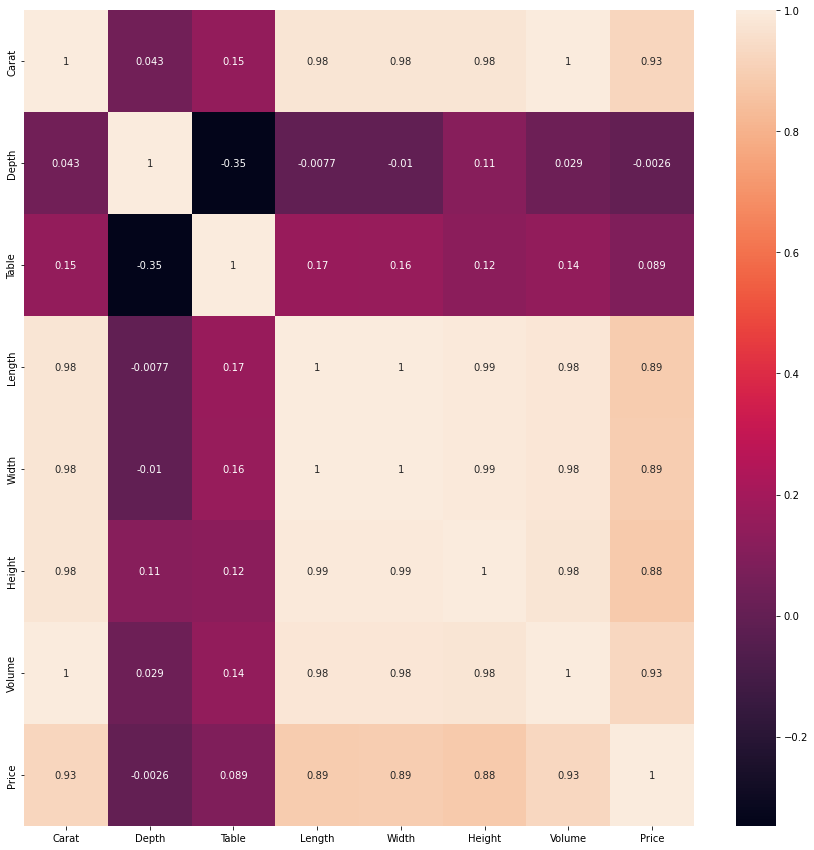

In [47]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr(), annot = True)

Since the 'Volume' column effectively combines the 'Height', 'Width' and 'Length' columns, these three columns are removed.

In [48]:
df = df.drop(['Length'], axis = 1)
df = df.drop(['Width'], axis = 1)
df = df.drop(['Height'], axis = 1)
df.head()

Carat        Cut Colour Clarity  Depth  Table      Volume  Price
30161   0.40  Very Good      D     SI1   60.3   62.0   63.626250    720
12643   1.01  Very Good      G     VS2   63.1   55.0  163.118736   5294
45942   0.50  Very Good      G    VVS2   62.4   56.0   81.805020   1723
16874   1.03  Very Good      F     VS1   60.2   55.0  172.405984   6733
5836    1.10    Premium      F     SI2   62.1   56.0  180.541696   3918

<AxesSubplot:>

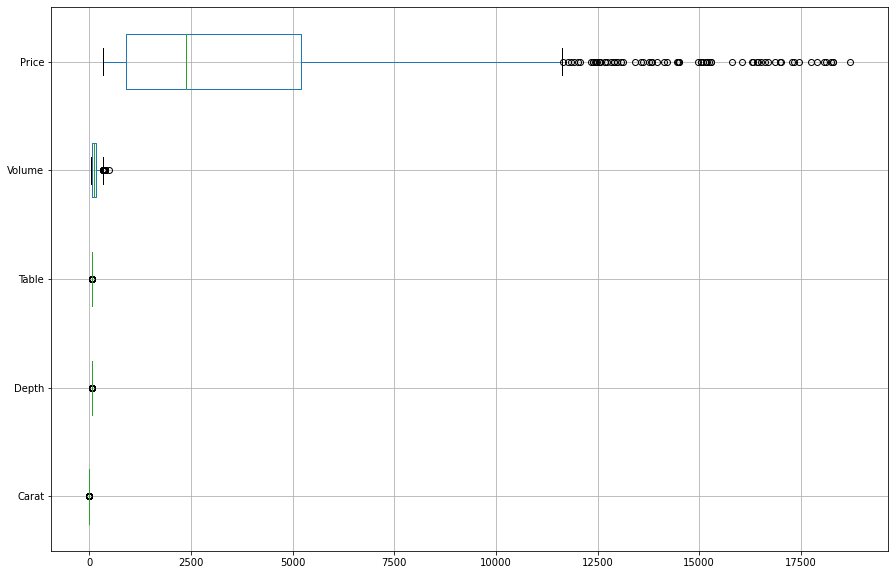

In [49]:
plt.figure(figsize =(15,10))
df.boxplot(vert = 0)

As the data has now been fully cleaned, we can move on to our data exploration and visualisation. Hence no more cleaning of the dataset is required

## Statistical Modelling <a id='sm'></a>

### Full Model Overview <a id='fmo'></a>

Ultimately, the model of our report aims to predict the 'Price' of diamonds using the independant variables 'Carat', 'Cut', 'Colour', 'Clarity', 'Depth', 'Table' and 'Volume'. To do so, one-hot-encoding is used to transform our existing categorial data into numbers (numerical) so that we can apply the algorithms of the imported libraries without problems. The original 'df' diamonds dataframe is now called 'onehot' after one-hot-encoding has been performed. Once this has been performed, the data is fitted into the variable 'full_model_fitted' which contains the predicted and residual values of the dataset. This data is stored into a Pandas dataframe called 'residual'.

We then perform backwards feature selection using p-values in order to get the reduced model of the residual data. The variable which this data is stored is named 'residuals_reduced'.

### Full Model: Multiple Linear Regression

Before starting, categorial data has been changed to continous data so that multiple linear regression is possible.

In [50]:
df = df.replace({'Colour' : { 'D' : 6, 'E' : 5, 'F' : 4, 'G' : 3, 'H': 2, 'I':1, 'J':0}})
df = df.replace({'Cut': {'Ideal':4, 'Premium': 3, 'Very Good':2, 'Good':1, 'Fair':0}})
df = df.replace({'Clarity': {"IF": 7, 'VVS1' :6, 'VVS2': 5, 'VS1': 4, 'VS2': 3, 'SI1':2, 'SI2': 1, 'I1':0}})

df = df.reset_index()
df.head()

index  Carat  Cut  Colour  Clarity  Depth  Table      Volume  Price
0  30161   0.40    2       6        2   60.3   62.0   63.626250    720
1  12643   1.01    2       3        3   63.1   55.0  163.118736   5294
2  45942   0.50    2       3        5   62.4   56.0   81.805020   1723
3  16874   1.03    2       4        4   60.2   55.0  172.405984   6733
4   5836   1.10    3       4        1   62.1   56.0  180.541696   3918

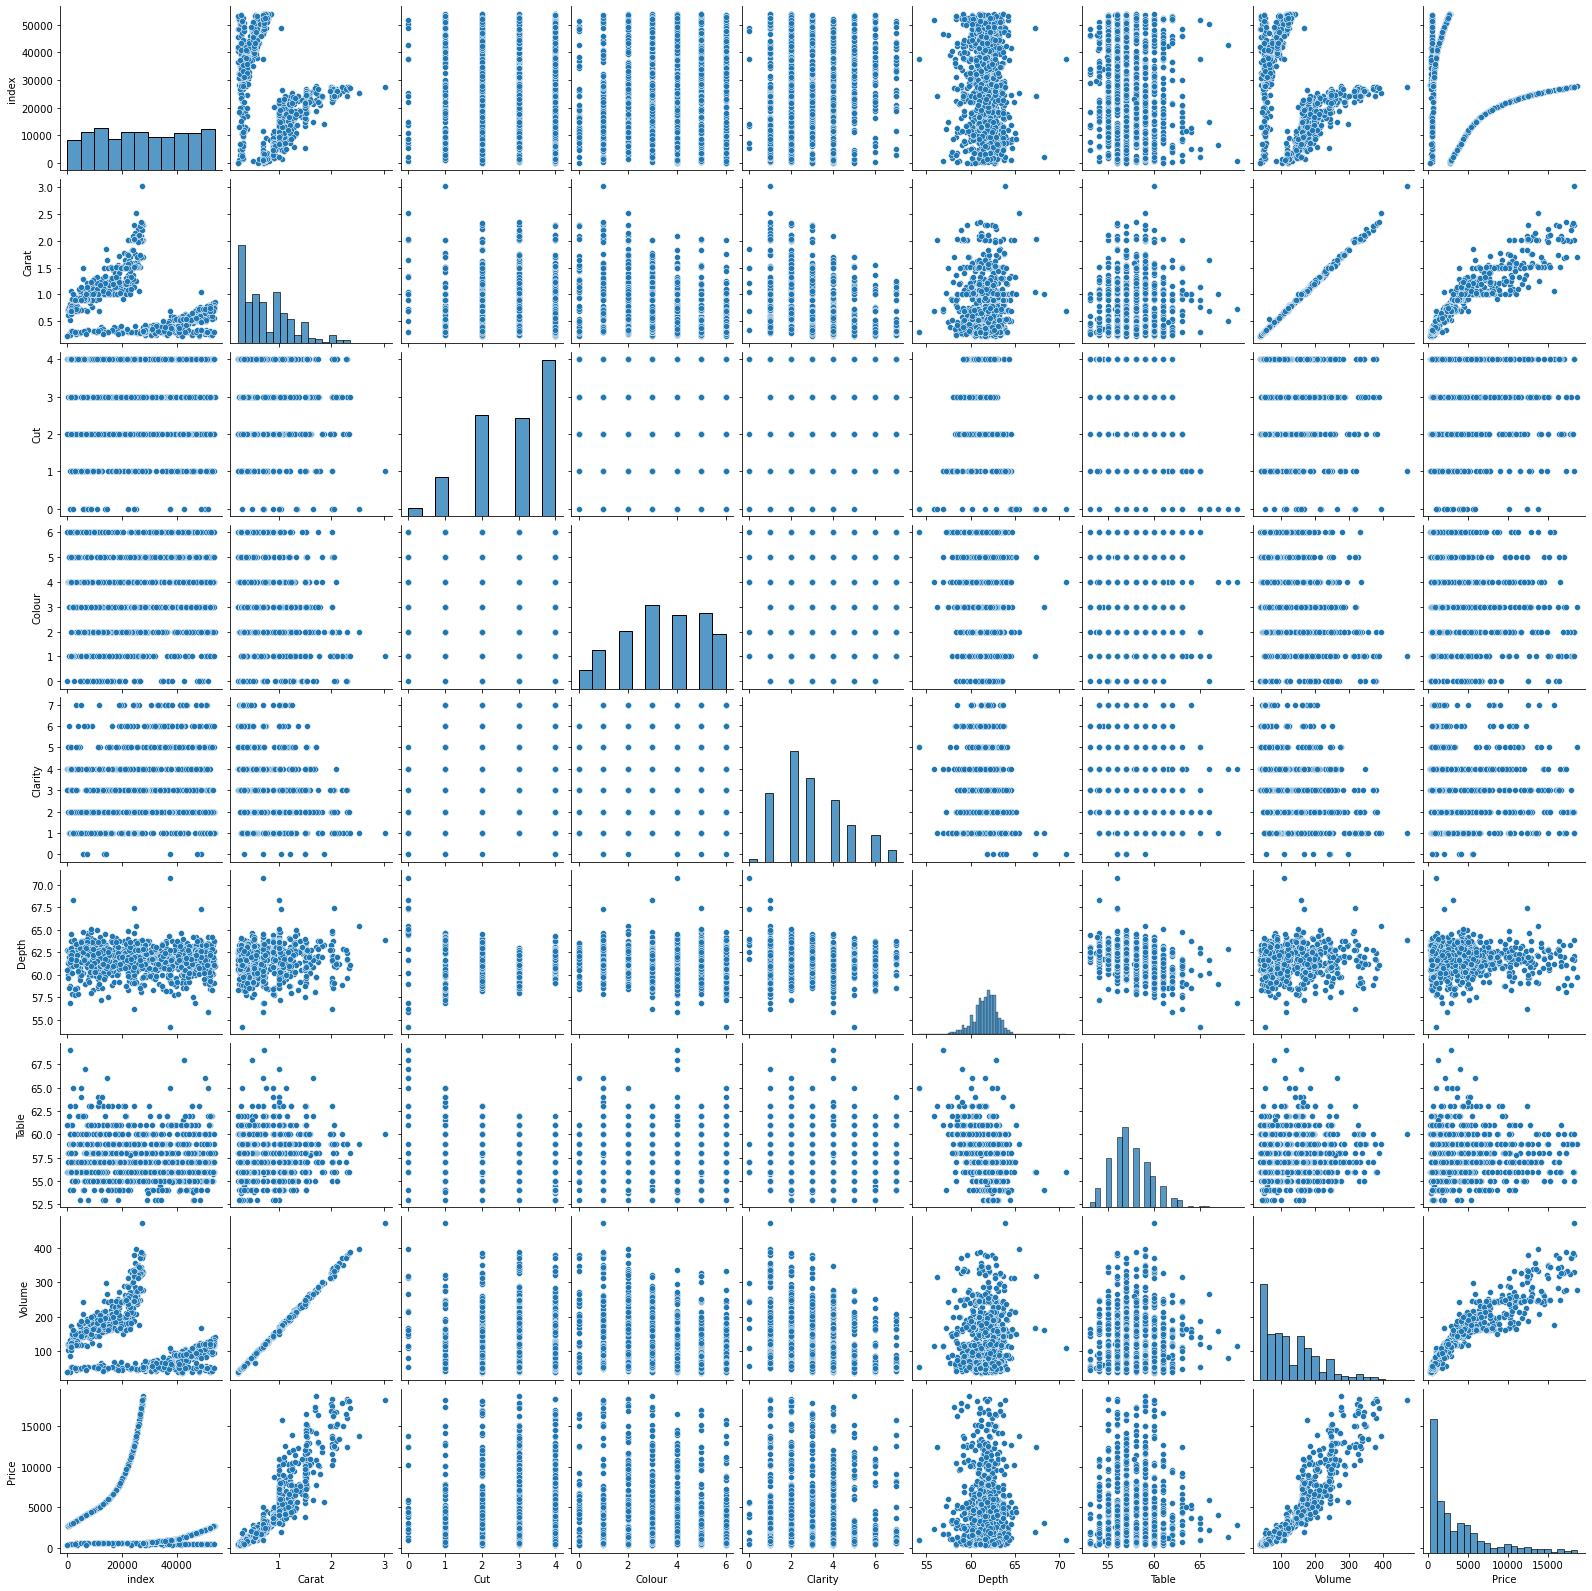

In [51]:
sns.pairplot(df)

In [52]:
fig = px.scatter(df, x="Price", y="Volume",
                title="Figure 1: Relationship between Price and Volume")
fig.show()

Figure 1 is a general visualisation indicating the relationship between the price and volume of diamonds.

As the data used does not hold many independent variables, we can manually add all independent features into a variable in string format for use later during one-hot-encoding.

In [53]:
formula = 'Price ~ Carat + Cut + Colour + Clarity + Depth + Table + Volume'
print('Formula: ', formula)

Formula:  Price ~ Carat + Cut + Colour + Clarity + Depth + Table + Volume


Here, one-hot-encoding is used on the categorial features of our dataset, that of which is stored for use in the 'oneshot' variable. 

In [54]:
onehot = pd.get_dummies(df, drop_first=True)
onehot.head()

index  Carat  Cut  Colour  Clarity  Depth  Table      Volume  Price
0  30161   0.40    2       6        2   60.3   62.0   63.626250    720
1  12643   1.01    2       3        3   63.1   55.0  163.118736   5294
2  45942   0.50    2       3        5   62.4   56.0   81.805020   1723
3  16874   1.03    2       4        4   60.2   55.0  172.405984   6733
4   5836   1.10    3       4        1   62.1   56.0  180.541696   3918

Now that one-hot-encoding has been performed, an ordinary least squares model is formed from our encoded data. This summary shows that the adjusted R-squared value is 0.915 and that most variables are significant.

In [55]:
full_model = sm.formula.ols(formula=formula, data=onehot)
full_model_fitted = full_model.fit()

In [56]:
print(full_model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1527.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:59:16   Log-Likelihood:                -8480.4
No. Observations:                1000   AIC:                         1.698e+04
Df Residuals:                     992   BIC:                         1.702e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3407.1032   2915.139     -1.169      0.2

The full model has an adjested R-Squared value of 0.914, this means that ~91% of the variance is explained within the model. By looking at the p-values, we observe that the majority of them are highly significant, though there is once instance where the value is 1.6%

The dataframe below depicts the actual Price of diamonds and places them beside the predicted and residual Prices from the 'onehot' dataframe made previously.

In [57]:
residual = pd.DataFrame({'Actual': onehot['Price'], 
                               'Predicted': full_model_fitted.fittedvalues, 
                               'Residual': full_model_fitted.resid})
residual.head()

Actual    Predicted     Residual
0     720   371.074979   348.925021
1    5294  5513.337883  -219.337883
2    1723  2100.905620  -377.905620
3    6733  6985.268531  -252.268531
4    3918  5924.224965 -2006.224965

### Full Model: Details of Assumptions Check

This section aims to check whether the data developed violates the following regression assumptions ([source](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html)):

1. **Linearity**: The relationship between X and the mean of Y is linear.
2. **Homoscedasticity**: The variance of residual is the same for any value of X.
3. **Independence**: Observations are independent of each other.
4. **Normality**: For any fixed value of X, Y is normally distributed.

In [58]:
fig = px.histogram(residual, x="Residual", 
                   nbins=20,
                title="Figure 2(a): Histogram of residuals (full model)")
fig.update_layout(yaxis_title='Frequency')
fig.show()

Though slightly right-skewed, this histogram indicates that the values are in some measure closely symmetric around zero, thus suggesting a somewhat normal distribution. Normality is adequately maintained.

In [59]:
fig = px.scatter(residual, x="Actual", y="Predicted",
                title="Figure 2(b): Scatterplot showing relationship between predicted and actual age of Full Model")
fig.show()

From this figure, we can observe that the predicted age and actual age of the regression model are closely correlated. The predictions become less linear as the actual price of the diamond increases, which is expected of the prediction model and basic dataset.

In [60]:
fig = px.scatter(residual, x="Actual", y="Residual",
                title="Figure 2(c): Scatterplot showing relationship between residual and actual age of Full Model")
fig.show()

In [61]:
fig = px.scatter(residual, x="Predicted", y="Residual",
                title="Figure 2(d): Scatterplot showing relationship between residual and predicted age of Full Model")
fig.show()

Here we observe that the difference between the predicted Price and residual Price follow a close pattern up until the price is below $5k. This indicates that there is a constant and somewhat linear variance of the errors, thus potentially violating the assumptions of linear regression.

### Backwards Feature Selection

We will now proceed with backwards feature selection using the code provided by the Phase 2 Report Template ([credit](https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb)).

In [62]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula)

# initialize feature-selected fit to full model
linreg_fit = full_model_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=onehot).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = onehot).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "Depth" with p-value 0.6163

Removing term "Carat" with p-value 0.235

Removing term "Table" with p-value 0.1148

***
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     2668.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:59:16   Log-Likelihood:                -8482.5
No. Observations:                1000   AIC:                         1.698e+04
Df Residuals:                     995   BIC:                         1.700e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef

Now that we have developed the reduced model, we will now store that into a new data frame.

In [63]:
residuals_reduced = pd.DataFrame({'Actual': onehot['Price'], 
                                  'Predicted': model_reduced_fitted.fittedvalues, 
                                  'Residual': model_reduced_fitted.resid})
residuals_reduced.head()

Actual    Predicted     Residual
0     720   483.646691   236.353309
1    5294  5432.932681  -138.932681
2    1723  2033.068942  -310.068942
3    6733  6784.365146   -51.365146
4    3918  5860.186383 -1942.186383

### Reduced Model: Details of Assumption Checks

The same plotting methods and diagnostic checks are used as in the previous full model.

In [64]:
fig = px.histogram(residuals_reduced, x="Residual", 
                   nbins=20,
                title="Figure 3(a): Histogram of residuals (reduced model)")
fig.update_layout(yaxis_title='Frequency')
fig.show()

In [65]:
fig = px.scatter(residuals_reduced, x="Actual", y="Predicted",
                title="Figure 3(b): Scatterplot showing relationship between predicted and actual age of Reduced Model")
fig.show()

In [66]:
fig = px.scatter(residuals_reduced, x="Actual", y="Residual",
                title="Figure 3(c): Scatterplot showing relationship between residual and actual age of Reduced Model")
fig.show()

In [67]:
fig = px.scatter(residuals_reduced, x="Predicted", y="Residual",
                title="Figure 3(d): Scatterplot showing relationship between residual and predicted age of Reduced Model")
fig.show()

As depicted in figures 3(a), 3(b), 3(c) and 3(d), the visualisations produced by the reduced model are practically identical to those produced by the full model.

## Critique & Limitations <a id='c'></a>

Although our model appears to predict the prices of diamonds up to a certain price point (~10k), the inaccuracy of the methods used make it impratical for real life usage. For instance, there is no way of verifying that the data used is complete or accurate, thus potentially incorrectly skewing the prediction process. Likewise, as with other multiple linear regression samples and problems, the closely correlated variables may lead readers to falsely conclude that a correlation is a causation (eg, that the colour, carat and volume of diamonds can accurately predict the price of diamonds).

Furthermore, another limitation may be that the processes performed above only looks at the mean of the dependent variable. Linear regression is not a compelte description of the relationship between variables such as the price and volume of diamonds. However, it seems that this is beyond the scope of linear regression.

## Summary & Conclusions <a id='s&c'></a>

### Project Summary <a id='ps'></a>

In an attempt to predict the prices of diamonds based off a selection of independent variables, we began `Phase I` of the project by preprocessing and cleaning the `diamonds.csv` dataset. This was done by removing extreme outliers and null values. Columns were changed to more appropriate names to make later processing easier. `Phase I` also involved the group visualsing dataset based on chosen variables to gain a more appropriate understanding of the relationship between said variables.

`Phase II` was started with the intention of applying multiple linear regresion techniques to the `diamonds.csv` dataset. To start, categorial data was changed to numerical so that one-hot-encoding could be performed on the dataset. Once this had been completed, multiple linear regression techniques were performed by fitting the model. Backward feature selection was performed on the full model, however, it appeared that the results of performing backward feature selection to produce a reduced model were almost identical to the previously produced results of the full model. Visualisations were performed on both the full model and the reduced model to determine the degree to which the model violated core regression assumptions.

### Summary of Findings

Using our independent variables, we were able to get a full model with an Adjisted R-squared value of roughly 90%.

The final multiple linear regression model has an Adjusted R-squared value of 91%, which is pretty high and near perfection. So, it appears that the variables we used were adequate in accurately predicting the price of diamonds in the Diamonds dataset within a multiple linear regression framework. To try to achieve a better adjusted R-squared value we could add more instances, variables or interactions to try and find some higher order terms to see if this would result in the improvement for the adjusted r-squared value. Nonetheless, it seems the multiple linear regression model was a suitable and appropriate choice for the task at hand.

### Conclusion

Our regression model appears to predict diamond price correctly within give or take $700 in the worst case. Although this is a large margin or error for the model to be extremely useful, there are still many practical purposes the model can be used for when buying diamonds. With a full and reduced model completed, our group was able to predict the prices of diamonds to a certain degree of success.

## References <a id='r'></a>

References Akman, D. D. (2022, October 14). OpenIntro Labs for Python. GitHub. https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynbMultiple 

Regression. (n.d.). Www.featureranking.com. Retrieved October 23, 2022, from https://www.featureranking.com/tutorials/statistics-tutorials/multiple-regression/Regression Case Study: Predicting Melbourne 

House Prices (Phase 2). (n.d.). Www.featureranking.com. Retrieved October 23, 2022, from https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study-melbourne-2/Simple 

Linear Regression. (2016, January 6). Sphweb.bumc.bu.edu. https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.htmlSK 

Part 0: Introduction to Predictive Modeling with Python and Scikit-Learn. (n.d.). Www.featureranking.com. Retrieved October 23, 2022, from https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-0-introduction-to-predictive-modeling-with-python-and-scikit-learn/

In [69]:
!jupyter nbconvert --execute --to html diamondpricepredictions.ipynb

[NbConvertApp] Converting notebook diamondpricepredictions.ipynb to html
[NbConvertApp] Writing 7117633 bytes to diamondpricepredictions.html
